<a href="https://colab.research.google.com/github/michaelharold/ML-/blob/main/CIFAR_10_CNN_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
transforms_train=transforms.Compose([
    transforms.RandomCrop(32,padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transforms_test=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))

])

In [ ]:
train=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms_train)
test=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms_test)
trainloader=torch.utils.data.DataLoader(train,shuffle=True,batch_size=32,num_workers=2)
testloader=torch.utils.data.DataLoader(test,batch_size=32,shuffle=False,num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(3,32,5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(32,64,5)
    self.dropout=nn.Dropout(0.5)
    self.pool=nn.MaxPool2d(2,2)
    self.fc1=nn.Linear(64*5*5,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x



In [ ]:
net=Net().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.01,momentum=0.9)
train_losses=[]
val_losses=[]



In [ ]:
def train_model(epochs=20):
  print("Training On: ",device)

  for epoch in range(epochs):
    net.train()
    running_loss=0.0
    epoch_loss_sum=0.0
    batch_total=0

    for i,data in enumerate(trainloader,0):
      inputs,labels=data
      inputs,labels=inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=net(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()

      running_loss+=loss.item()
      epoch_loss_sum+=loss.item()
      batch_total+=1

      if i%500==499:
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 500:.3f}')
        running_loss = 0.0

    avg_train_loss = epoch_loss_sum / batch_total
    train_losses.append(avg_train_loss)

    avg_val_loss,val_acc=validate_model(testloader)
    val_losses.append(avg_val_loss)

    print(f"--- Epoch [{epoch+1}/{epochs}] Summary ---")
    print(f"Train Loss: {avg_train_loss:.4f}")
    print(f"Val Loss:   {avg_val_loss:.4f} | Val Acc: {val_acc:.2f}%\n")




In [ ]:
def validate_model(loader):
  net.eval()
  correct=0
  total=0
  total_loss=0.0

  with torch.no_grad():
    for data in loader:
      inputs,labels=data
      inputs = inputs.to(device)
      labels = labels.to(device)
      outputs=net(inputs)
      loss=criterion(outputs,labels)
      total_loss+=loss.item()
      _,predicted=torch.max(outputs,1)
      total+=labels.size(0)
      correct+=(predicted==labels).sum().item()
  avg_loss=total_loss/len(loader)
  acc=100*correct/total
  return avg_loss,acc


Training On:  cuda


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>if w.is_alive():

Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
      self._shutdown_workers()  
    File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^^    if w.is_alive():^
 ^ ^  ^ ^ ^^ ^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^ ^^ ^^  ^^ 
   File "/usr/lib/

[1,   500] loss: 0.951
[1,  1000] loss: 0.955
[1,  1500] loss: 0.934
--- Epoch [1/20] Summary ---
Train Loss: 0.9469
Val Loss:   0.8456 | Val Acc: 71.31%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
self._shutdown_workers()
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
self._shutdown_workers()
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
if w.is_alive():    
if w.is_alive(): 
          ^ ^ ^ ^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
assert self._par

[2,   500] loss: 0.915
[2,  1000] loss: 0.912
[2,  1500] loss: 0.903
--- Epoch [2/20] Summary ---
Train Loss: 0.9095
Val Loss:   0.8173 | Val Acc: 71.98%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():
     Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
 Traceback (most recent call last):
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
^^    self._shutdown_workers()^
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^    ^if w.is_alive():
^ ^^  ^^ 
   File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
      assert self._parent_pid == os.getpid(), 'can only test a child process'^
^  ^ ^ ^^  ^ ^^^ ^^ 
  File "/usr/l

[3,   500] loss: 0.879
[3,  1000] loss: 0.884
[3,  1500] loss: 0.888
--- Epoch [3/20] Summary ---
Train Loss: 0.8833
Val Loss:   0.8404 | Val Acc: 71.22%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Exception ignored in: Traceback (most recent call last):
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

    Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
self._shutdown_workers()
    self._shutdown_workers()  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers

     if w.is_alive(): 
          ^  ^^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    ^
assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python

[4,   500] loss: 0.864
[4,  1000] loss: 0.856
[4,  1500] loss: 0.853
--- Epoch [4/20] Summary ---
Train Loss: 0.8574
Val Loss:   0.7889 | Val Acc: 73.01%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>

 Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
     self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
      if w.is_alive():^
^  ^ ^  ^ ^ ^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^
   File "/usr/lib/pytho

[5,   500] loss: 0.851
[5,  1000] loss: 0.830
[5,  1500] loss: 0.824
--- Epoch [5/20] Summary ---
Train Loss: 0.8363
Val Loss:   0.7774 | Val Acc: 73.08%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
        self._shutdown_workers()
if w.is_alive():
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
       if w.is_alive(): 
        ^^  ^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'^

    File "/usr/lib/pyth

[6,   500] loss: 0.800
[6,  1000] loss: 0.827
[6,  1500] loss: 0.822
--- Epoch [6/20] Summary ---
Train Loss: 0.8159
Val Loss:   0.7738 | Val Acc: 73.62%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()Exception ignored in: 
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
    if w.is_alive():Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
        self._shutdown_workers() 
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
      if w.is_alive():^
^^^^ ^^^ ^ ^ ^ ^  
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    ^^assert self._parent_pid == os.getpid(), 'can only test a child process'
^ ^ ^ ^ ^^ ^ ^ ^ 
    File "/usr/

[7,   500] loss: 0.791
[7,  1000] loss: 0.806
[7,  1500] loss: 0.803
--- Epoch [7/20] Summary ---
Train Loss: 0.7986
Val Loss:   0.7960 | Val Acc: 73.88%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
Exception ignored in:   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
    Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
if w.is_alive():
    self._shutdown_workers()  
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
     if w.is_alive():  
    ^ ^ ^ ^^  ^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'^^

  File "/usr/lib/python

[8,   500] loss: 0.787
[8,  1000] loss: 0.790
[8,  1500] loss: 0.793
--- Epoch [8/20] Summary ---
Train Loss: 0.7893
Val Loss:   0.7557 | Val Acc: 74.70%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():
       Exception ignored in: ^^<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>^^
^^^Traceback (most recent call last):
^^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
^^^    
self._shutdown_workers()  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive

      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
assert self._parent_pid == os.getpid(), 'can only test a child process'    
if w.is_alive(): 
                ^ ^^^^^^^^^^^^^^^^^^^^^^^


[9,   500] loss: 0.778
[9,  1000] loss: 0.774
[9,  1500] loss: 0.779
--- Epoch [9/20] Summary ---
Train Loss: 0.7772
Val Loss:   0.8065 | Val Acc: 72.46%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

     self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
       if w.is_alive():
 ^ ^^ ^  ^ ^ ^ ^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^   ^ ^ 
    File "/usr/lib

[10,   500] loss: 0.775
[10,  1000] loss: 0.775
[10,  1500] loss: 0.762
--- Epoch [10/20] Summary ---
Train Loss: 0.7683
Val Loss:   0.7361 | Val Acc: 74.97%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():
 Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80> 
 Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
       ^^self._shutdown_workers()^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^^    ^if w.is_alive():^
^ ^ ^ ^ 
   File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
     assert self._parent_pid == os.getpid(), 'can only test a child process'
  ^^  ^ ^  ^ ^ ^ ^ ^ ^^^^^^^^
^^  Fil

[11,   500] loss: 0.765
[11,  1000] loss: 0.739
[11,  1500] loss: 0.760
--- Epoch [11/20] Summary ---
Train Loss: 0.7555
Val Loss:   0.7259 | Val Acc: 75.16%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
if w.is_alive():    
self._shutdown_workers() 
    File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
      if w.is_alive():  
^ ^  ^ ^ ^  ^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^ 
   File "/usr/lib/pyth

[12,   500] loss: 0.745
[12,  1000] loss: 0.756
[12,  1500] loss: 0.733
--- Epoch [12/20] Summary ---
Train Loss: 0.7455
Val Loss:   0.7376 | Val Acc: 74.65%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>    
self._shutdown_workers()Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():self._shutdown_workers()
 
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
       if w.is_alive(): 
    ^^ ^ ^^ ^ ^^ ^^^^^^^^^^^^^^
^^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
assert self._par

[13,   500] loss: 0.733
[13,  1000] loss: 0.727
[13,  1500] loss: 0.739
--- Epoch [13/20] Summary ---
Train Loss: 0.7314
Val Loss:   0.7436 | Val Acc: 75.26%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
Exception ignored in:   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>    self._shutdown_workers()
Traceback (most recent call last):

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
self._shutdown_workers()    
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers

      if w.is_alive(): 
        ^ ^ ^ ^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    assert self._parent_pid == os.getpid(), 'can only test a child process'^
 
   File "/usr/lib/pyth

[14,   500] loss: 0.718
[14,  1000] loss: 0.729
[14,  1500] loss: 0.745
--- Epoch [14/20] Summary ---
Train Loss: 0.7289
Val Loss:   0.7250 | Val Acc: 75.26%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():
 Exception ignored in:  <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>  
Traceback (most recent call last):
    File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
     self._shutdown_workers()^
^^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^^    if w.is_alive():^^
 ^ ^^ ^^
    File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'  
^ ^ ^^ ^ ^^ ^  ^ ^ ^  ^^
^  File "/u

[15,   500] loss: 0.733
[15,  1000] loss: 0.724
[15,  1500] loss: 0.720
--- Epoch [15/20] Summary ---
Train Loss: 0.7265
Val Loss:   0.7223 | Val Acc: 75.50%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>Traceback (most recent call last):

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
        self._shutdown_workers()self._shutdown_workers()

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
        if w.is_alive():if w.is_alive():
 
           ^  ^^^^^^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive

      File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
assert self._par

[16,   500] loss: 0.720
[16,  1000] loss: 0.711
[16,  1500] loss: 0.725
--- Epoch [16/20] Summary ---
Train Loss: 0.7182
Val Loss:   0.7844 | Val Acc: 74.41%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
    if w.is_alive():Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>   
 Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
      self._shutdown_workers()^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^    ^if w.is_alive():^
^ ^ ^ ^   ^ ^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^^ ^ ^ ^ ^ 
   File "/usr/lib/

[17,   500] loss: 0.715
[17,  1000] loss: 0.714
[17,  1500] loss: 0.716
--- Epoch [17/20] Summary ---
Train Loss: 0.7150
Val Loss:   0.6977 | Val Acc: 76.34%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
Exception ignored in:     self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
Traceback (most recent call last):
    if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

        self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
 ^    ^if w.is_alive():
^^  ^ ^  ^ ^ ^^^^^^^^^
^^^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'
^ ^
   File "/usr/lib/pyth

[18,   500] loss: 0.694
[18,  1000] loss: 0.712
[18,  1500] loss: 0.710
--- Epoch [18/20] Summary ---
Train Loss: 0.7065
Val Loss:   0.6999 | Val Acc: 76.53%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    self._shutdown_workers()Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers

Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
if w.is_alive():    
self._shutdown_workers() 
    File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
      if w.is_alive(): 
 ^ ^ ^ ^  ^^ ^^ ^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^^^assert self._parent_pid == os.getpid(), 'can only test a child process'^
 ^
  File "/usr/lib/pytho

[19,   500] loss: 0.704
[19,  1000] loss: 0.697
[19,  1500] loss: 0.709
--- Epoch [19/20] Summary ---
Train Loss: 0.7039
Val Loss:   0.6861 | Val Acc: 77.35%



Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7d227c111f80>
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers

    Traceback (most recent call last):
if w.is_alive():  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1654, in __del__

           ^self._shutdown_workers()^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1637, in _shutdown_workers
^    if w.is_alive():
^^ ^  ^ ^^ ^ ^ ^^
^      File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^assert self._parent_pid == os.getpid(), 'can only test a child process'^^
^  ^ ^ ^^ ^ ^
   File "/usr/lib

[20,   500] loss: 0.694
[20,  1000] loss: 0.686
[20,  1500] loss: 0.714
--- Epoch [20/20] Summary ---
Train Loss: 0.6974
Val Loss:   0.7583 | Val Acc: 75.78%



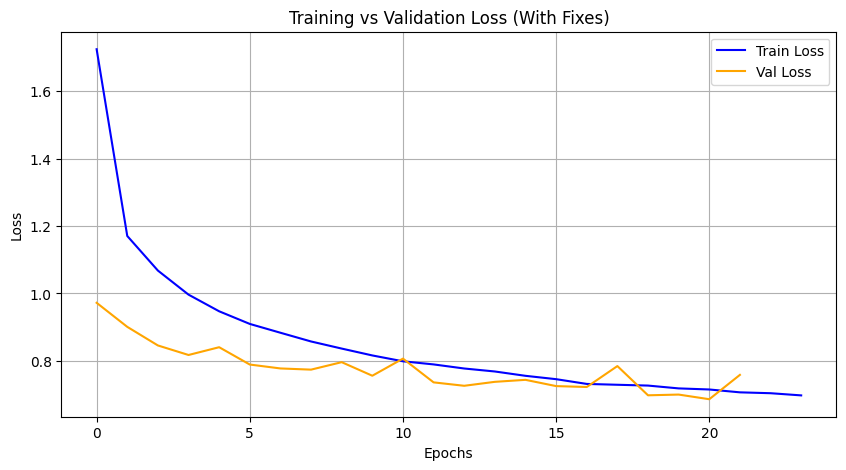

In [ ]:

train_model(epochs=20)
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(val_losses, label='Val Loss', color='orange')
plt.title("Training vs Validation Loss (With Fixes)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

I am 99.61% sure this is a: DOG


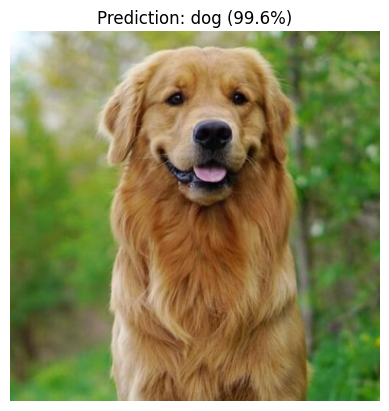

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F


classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def predict_single_image(model, image_path):


    device = next(model.parameters()).device


    try:
        img = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"Error: Could not open image at {image_path}\n{e}")
        return


    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


    img_tensor = transform(img)
    img_batch = img_tensor.unsqueeze(0)

    img_batch = img_batch.to(device)


    model.eval()
    with torch.no_grad():
        outputs = model(img_batch)


        probs = F.softmax(outputs, dim=1)
        confidence, predicted_idx = torch.max(probs, 1)

        predicted_class = classes[predicted_idx.item()]
        score = confidence.item() * 100


    print(f"I am {score:.2f}% sure this is a: {predicted_class.upper()}")
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class} ({score:.1f}%)")
    plt.axis('off')
    plt.show()
predict_single_image(net,'/content/golden_retriever.jpg')